# MSBA 605-77 - Python for Analytics
## Problem Solving Exercise 5
### Logisitics
1. Get into your weekly group.
1. Discuss and complete the assignment __together__. Don’t just assign different problems to each teammate! That defeats the purpose of team-based learning.
1. Choose a recorder to prepare the final copy to submit to instructor in Blackboard. __Only one person needs to submit__ on behalf of the team.

__Names of group members__: Cameron Bosley, Elizabeth Dunaway, Jonathan Thompson (double click the cell in Jupyter to edit)<br>
__Due__: Sunday, November 5 (by 11:59 PM)

Add your code to the cells below. When finished, be sure to save your notebook, then _Close and Shutdown Notebook_ from the _File_ menu. Return to Blackboard and have recorder upload your completed Notebook file (`PSE5.ipynb`) on behalf of the group.

In [29]:
import numpy as np  # Make sure you run this cell before using NumPy
import pandas as pd # Make sure you run this cell before using pandas
import matplotlib.pyplot as plt # Make sure you run this cell before using matplotlib
import seaborn as sns # Make sure you run this cell before using seaborn

> __Note__: If you installed Miniconda and created the `pydata-book` environment as directed in [Section 1.4](https://wesmckinney.com/book/preliminaries#installation_and_setup), you will need to install seaborn before you use it, using `conda install seaborn` at the Anaconda prompt or Terminal. You will need to shut down Jupyter before you use conda to install the seaborn module as above.
> 
> Similarly, to use pandas `read_excel` function, you will need to install the `openpyxl` module before you use it, using `conda install openpyxl` at the Anaconda prompt or Terminal. You will need to shut down Jupyter before you use conda to install the `openpyxl` module as above.

## Part 1 

### Problem 1
Using the technique shown in [Section 6.1 Reading and Writing Data in Text Format](https://wesmckinney.com/book/accessing-data#io_flat_files), read in the file called `movies-data.xlsx` using pandas `read_excel` function creating a `DataFrame`. The file contains movie data in a tabular format. Make sure you store this Notebook file and the provided `.xlsx` file in the same folder location. This way, you can simply use the filename without additional path information when reading the file. Use the `.head()` method to print the first 5 rows of your newly created `DataFrame`. As noted above, you may need to install the `openpyxl` module before you can successfully call `read_excel`. (2 pts.)

In [4]:
filename = pd.read_excel('movies-data.xlsx')
filename
# Add your code here

,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION,Genre_description,Century,Country_LF,age_certification
0,David Attenborough: A Life on Our Planet,2020,9.0,31180,83,documentary,GB,This movie is neither funny nor scary,21st Century,United Kingdom,PG
1,Inception,2010,8.8,2268288,148,scifi,GB,This movie is neither funny nor scary,21st Century,United Kingdom,PG-13
2,Forrest Gump,1994,8.8,1994599,142,drama,US,This movie is neither funny nor scary,20th Century,United States,PG-13
3,Anbe Sivam,2003,8.7,20595,160,comedy,IN,This movie is funny,21st Century,India,NaN
4,Bo Burnham: Inside,2021,8.7,44074,87,comedy,US,This movie is funny,21st Century,United States,R
...,...,...,...,...,...,...,...,...,...,...,...
382,The Trip,2021,6.9,19706,113,comedy,NO,This movie is funny,21st Century,Norway,NaN
383,The Dirt,2019,6.9,47603,108,drama,US,This movie is neither funny nor scary,21st Century,United States,R
384,Top Gun,1986,6.9,329656,110,drama,US,This movie is neither funny nor scary,20th Century,United States,PG
385,Radhe Shyam,2022,6.9,21328,138,romance,IN,This movie is neither funny nor scary,21st Century,India,NaN


### Problem 2
Several movies are missing an `age_certification` (such as G, PG, etc.). These appear as `NaN` values in the `DataFrame`. Count the number of `Nan` values in this column and print the result. (3 pts.)

In [11]:
filename_nacount = filename['age_certification'].isna().sum()
print(filename_nacount)
# Add your code here

112


### Problem 3
Use the `.fillna` method of the `DataFrame` to fill those missing values with `'Unrated'` as described in [Section 7.1's Filling In Missing Data subsection](https://wesmckinney.com/book/data-cleaning#pandas_missing_filling). Count the number of `NaN` values now in this column and print the result. (3 pts.)

In [18]:
filename.fillna("Unrated", inplace = True)
filename_nacount2 = filename.isna().sum()
print(filename)
print(filename_nacount2)
# Add your code here

                                        TITLE  RELEASE_YEAR  SCORE  \
0    David Attenborough: A Life on Our Planet          2020    9.0   
1                                   Inception          2010    8.8   
2                                Forrest Gump          1994    8.8   
3                                  Anbe Sivam          2003    8.7   
4                          Bo Burnham: Inside          2021    8.7   
..                                        ...           ...    ...   
382                                  The Trip          2021    6.9   
383                                  The Dirt          2019    6.9   
384                                   Top Gun          1986    6.9   
385                               Radhe Shyam          2022    6.9   
386                       Sorry to Bother You          2018    6.9   

     NUMBER_OF_VOTES  DURATION   MAIN_GENRE MAIN_PRODUCTION  \
0              31180        83  documentary              GB   
1            2268288       148   

### Problem 4
Use [matplotlib `pie` plot](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py) to display a pie chart showing the percentages of each of the `age_certification` categories (such as G, PG, etc.). An easy way to create the counts of the unique `age_certification` values is to use the `np.unique` function with the DataFrame's `'age_certification'` column and the `return_counts=True` argument. This will return a tuple with the unique values and associated counts of each value respectively. These can then be used with matplotlib's `pie` method. (4 pts.)

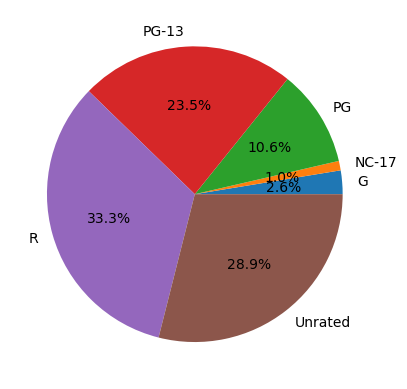

In [39]:
labels, sizes = np.unique(filename['age_certification'], return_counts=True)
array_agecount
fg, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%');



# Add your code here

### Problem 5
Explore whether movies are actually getting longer (or does it just feel like it?) by plotting movie duration by release year. Use matplotlib or seaborn to create a lineplot. Set a figure size of 10" x 4" as described in the [matplotlib documenation](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_size_units.html). Rotate the tick labels on the x-axis (release year) by 90 degrees and make sure that both the x and y axes are labeled. (4 pts.)

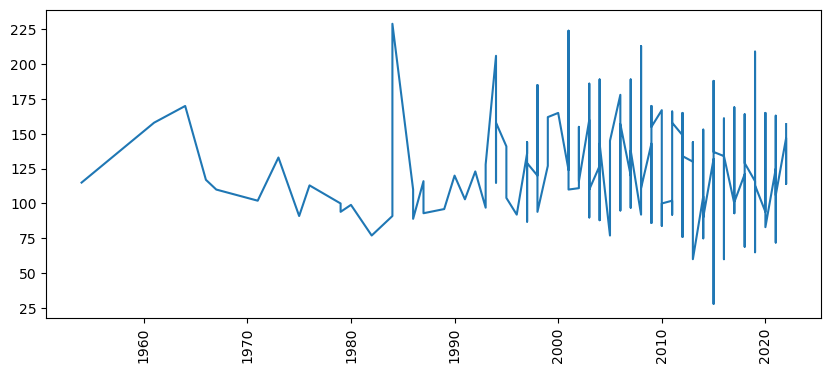

,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION,Genre_description,Century,Country_LF,age_certification
185,White Christmas,1954,7.5,42373,115,romance,US,This movie is neither funny nor scary,20th Century,United States,Unrated
183,The Guns of Navarone,1961,7.5,50150,158,war,US,This movie is neither funny nor scary,20th Century,United States,Unrated
107,My Fair Lady,1964,7.8,94121,170,drama,US,This movie is neither funny nor scary,20th Century,United States,G
243,The Professionals,1966,7.3,16168,117,western,US,This movie is neither funny nor scary,20th Century,United States,PG-13
114,Bonnie and Clyde,1967,7.7,111189,110,drama,US,This movie is neither funny nor scary,20th Century,United States,R
...,...,...,...,...,...,...,...,...,...,...,...
246,Badhaai Do,2022,7.3,15032,147,comedy,IN,This movie is funny,21st Century,India,Unrated
385,Radhe Shyam,2022,6.9,21328,138,romance,IN,This movie is neither funny nor scary,21st Century,India,Unrated
58,Dasvi,2022,8.0,13140,125,drama,IN,This movie is neither funny nor scary,21st Century,India,Unrated
265,The Tinder Swindler,2022,7.2,57606,114,crime,GB,This movie is neither funny nor scary,21st Century,United Kingdom,Unrated


In [46]:
filename.sort_values(by='RELEASE_YEAR', inplace=True)
x = filename['RELEASE_YEAR']
y = filename['DURATION']

plt.subplots(figsize=(10,4))
plt.plot(x,y)
plt.xticks(rotation=90)
plt.show()
filename
# Add your code here

### Problem 6
Next, let's explore the average duration of movies by `age_certification` by using seaborn to create a `barplot`. See the [`barplot` tutorial](https://seaborn.pydata.org/tutorial/categorical.html#bar-plots) and examples from the [`barplot` documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot). `barplot` will default to using the mean of the durations when you make duration the `y` variable and `age_certification` the `x` variable. Your DataFrame will be the `data` argument. Add the `errorbar=None` argument to suppress the error bars. (3 pts.)

For __2 pts. of Extra Credit__, add the mean duration as a label to the top of each bar. __Hint__: This can be done quite easily within seaborn using the `ax.bar_label` method. The examples linked from the [`barplot` documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot) show this simple but effective approach.

<Axes: xlabel='age_certification', ylabel='DURATION'>

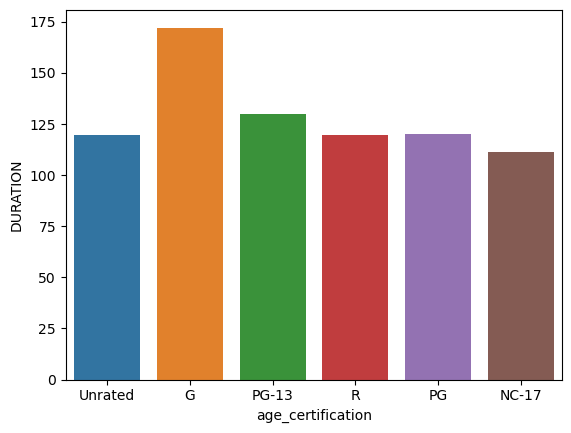

In [61]:
sns.barplot(filename, x="age_certification" , y="DURATION", errorbar = None)

# Add your code here

### Problem 7
Next, let's explore if a linear relationship may exist between between a movie's score and number of votes by using seaborn to create a `regplot` or `lmplot`. As noted in the seaborn [regression tutorial](https://seaborn.pydata.org/tutorial/regression.html), both functions can be used to visualize a linear fit. Both draw a scatterplot of two variables, `x` and `y`, and then fit the regression model `y ~ x` and plot the resulting regression line and a 95% confidence interval for that regression. The functions draw similar plots, but `regplot` is an _axes-level_ function, and `lmplot` is a _figure-level_ function. Either will work here. Use `SCORE` as the `x` variable and `NUMBER_OF_VOTES` as the `y` variable. Your DataFrame will be the `data` argument. (3 pts.)

,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION,Genre_description,Century,Country_LF,age_certification
185,White Christmas,1954,7.5,42373,115,romance,US,This movie is neither funny nor scary,20th Century,United States,Unrated
183,The Guns of Navarone,1961,7.5,50150,158,war,US,This movie is neither funny nor scary,20th Century,United States,Unrated
107,My Fair Lady,1964,7.8,94121,170,drama,US,This movie is neither funny nor scary,20th Century,United States,G
243,The Professionals,1966,7.3,16168,117,western,US,This movie is neither funny nor scary,20th Century,United States,PG-13
114,Bonnie and Clyde,1967,7.7,111189,110,drama,US,This movie is neither funny nor scary,20th Century,United States,R
...,...,...,...,...,...,...,...,...,...,...,...
246,Badhaai Do,2022,7.3,15032,147,comedy,IN,This movie is funny,21st Century,India,Unrated
385,Radhe Shyam,2022,6.9,21328,138,romance,IN,This movie is neither funny nor scary,21st Century,India,Unrated
58,Dasvi,2022,8.0,13140,125,drama,IN,This movie is neither funny nor scary,21st Century,India,Unrated
265,The Tinder Swindler,2022,7.2,57606,114,crime,GB,This movie is neither funny nor scary,21st Century,United Kingdom,Unrated


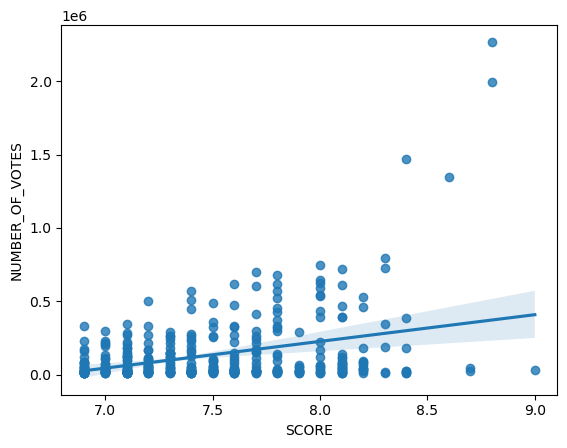

In [50]:
sns.regplot(filename, x="SCORE", y="NUMBER_OF_VOTES")
filename
# Add your code here

### Problem 8
Finally, let's finish by creating a graphical representation of all the relationships between the numeric variables in your DataFrame by using seaborn to create a `pairplot` as shown in [Section 9.2](https://wesmckinney.com/book/plotting-and-visualization#vis_pandas_splom). Include the kernel density estimate by including the `diag_kind="kde"` argument. Ignore any warning about tight layout. (3 pts.)

C:\Users\camer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION,Genre_description,Century,Country_LF,age_certification
185,White Christmas,1954,7.5,42373,115,romance,US,This movie is neither funny nor scary,20th Century,United States,Unrated
183,The Guns of Navarone,1961,7.5,50150,158,war,US,This movie is neither funny nor scary,20th Century,United States,Unrated
107,My Fair Lady,1964,7.8,94121,170,drama,US,This movie is neither funny nor scary,20th Century,United States,G
243,The Professionals,1966,7.3,16168,117,western,US,This movie is neither funny nor scary,20th Century,United States,PG-13
114,Bonnie and Clyde,1967,7.7,111189,110,drama,US,This movie is neither funny nor scary,20th Century,United States,R
...,...,...,...,...,...,...,...,...,...,...,...
246,Badhaai Do,2022,7.3,15032,147,comedy,IN,This movie is funny,21st Century,India,Unrated
385,Radhe Shyam,2022,6.9,21328,138,romance,IN,This movie is neither funny nor scary,21st Century,India,Unrated
58,Dasvi,2022,8.0,13140,125,drama,IN,This movie is neither funny nor scary,21st Century,India,Unrated
265,The Tinder Swindler,2022,7.2,57606,114,crime,GB,This movie is neither funny nor scary,21st Century,United Kingdom,Unrated


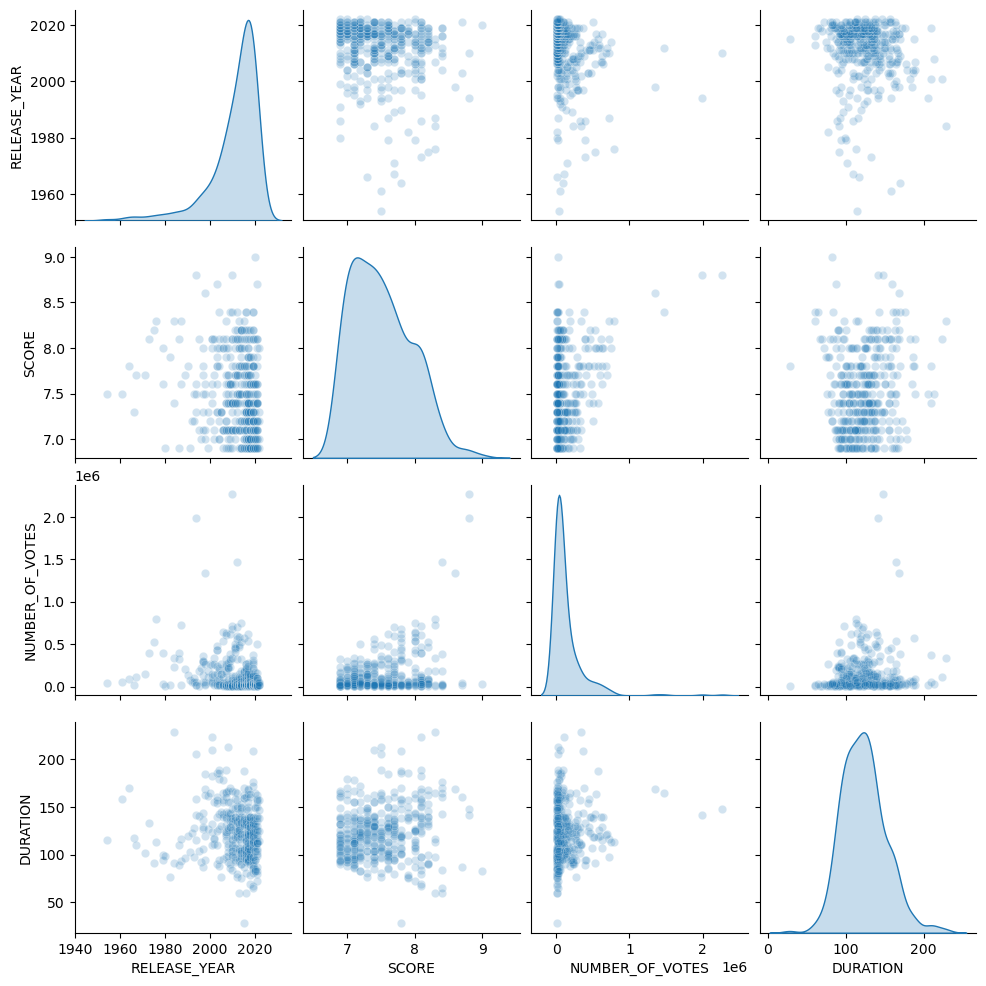

In [59]:
sns.pairplot(filename, diag_kind = "kde", plot_kws={"alpha":0.2})
filename

# Add your code here